In [1]:
import os
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 载入初始CSV数据

In [2]:
path = os.getcwd()+'/../data/20122018freshwater.csv'
df = pd.read_csv(path, na_values = np.nan)
print(df.shape)

(33614, 8)


In [3]:
df = df.dropna(axis=0)
print(df.shape)

(33612, 8)


In [4]:
df = df.rename(columns={'pH':'$pH$','DO(mg/l)':'$DO\,(mg/L)$','CODMn(mg/l)':'$COD_{Mn}\,(mg/L)$','NH3-N(mg/l)':'$NH3-N\,(mg/L)$'})

In [5]:
df.head()

,水系,点位名称,河流名称,$pH$,"$DO\,(mg/L)$","$COD_{Mn}\,(mg/L)$","$NH3-N\,(mg/L)$",本周水质
0,巢湖流域,安徽巢湖裕溪口,巢湖,7.09,10.0,5.7,0.33,3
1,巢湖流域,合肥湖滨,巢湖,6.94,12.0,5.4,0.40,3
2,巢湖流域,安徽巢湖裕溪口,巢湖,7.20,9.6,4.9,0.34,3
3,巢湖流域,合肥湖滨,巢湖,6.80,11.6,6.3,0.59,4
4,巢湖流域,合肥湖滨,巢湖,6.75,11.0,6.2,0.64,4


In [6]:
cats = df.本周水质.value_counts()

In [7]:
cats_df = pd.DataFrame({'cats':cats.index[0:],'fre':cats.values[0:]})

In [8]:
cats_df

,cats,fre
0,2,13272
1,3,8797
2,4,5472
3,1,2438
4,6,2146
5,5,1487


In [9]:
width_inch = 6*0.84

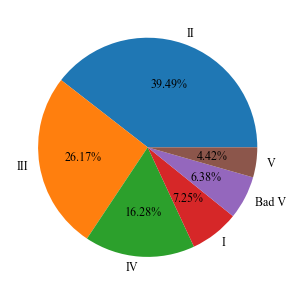

In [10]:
plt.rc('font', family='Times New Roman', size=12)
# matplotlib.rcParams['font.sans-serif']=['SimSun']
# plt.rc('font', family='SimSun', size=12)
fig = plt.figure(figsize=[width_inch, width_inch])
plt.pie(cats_df.fre, labels=['II','III','IV','I','Bad V','V'],autopct='%1.2f%%') #画饼图（数据，数据对应的标签，百分数保留两位小数点）
plt.savefig("../img/pie.png")
plt.show()

In [11]:
df = df[['$pH$', '$DO\,(mg/L)$', '$COD_{Mn}\,(mg/L)$', '$NH3-N\,(mg/L)$']]

In [12]:
df.head()

,$pH$,"$DO\,(mg/L)$","$COD_{Mn}\,(mg/L)$","$NH3-N\,(mg/L)$"
0,7.09,10.0,5.7,0.33
1,6.94,12.0,5.4,0.40
2,7.20,9.6,4.9,0.34
3,6.80,11.6,6.3,0.59
4,6.75,11.0,6.2,0.64


# 调取matplotlib做数据可视化

In [13]:
# 查看有哪些字体
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/Library/Fonts/Georgia.ttf',
 '/Library/Fonts/STIXIntSmReg.otf',
 '/System/Library/Fonts/SFCompactRounded-Semibold.otf',
 '/Library/Fonts/Luminari.ttf',
 '/Library/Fonts/Wingdings 3.ttf',
 '/Library/Fonts/STIXIntUpDBol.otf',
 '/System/Library/Fonts/SFNSDisplay.ttf',
 '/System/Library/Fonts/SFCompactDisplay-Semibold.otf',
 '/System/Library/Fonts/SFNSSymbols-Thin.otf',
 '/Library/Fonts/Tahoma.ttf',
 '/System/Library/Fonts/SFNSSymbols-Regular.otf',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/Library/Fonts/STIXVarBol.otf',
 '/System/Library/Fonts/SFNSTextCondensed-Medium.otf',
 '/System/Library/Fonts/Apple Braille.ttf',
 '/Library/Fonts/NISC18030.ttf',
 '/Library/Fonts/Georgia Bold Italic.ttf',
 '/Library/Fonts/Arial Narrow Bold.ttf',
 '/Library/Fonts/STIXSizFiveSymReg.otf',
 '/System/Library/Fonts/SFCompactDisplay-Thin.otf',
 '/System/Library/Fonts/Apple Symbols.ttf',
 '/System/Library/Fonts/SFNSTextCondensed-Bold.otf',
 '/Library/Fonts/STIXSizFourSymReg.otf',
 '/Syste

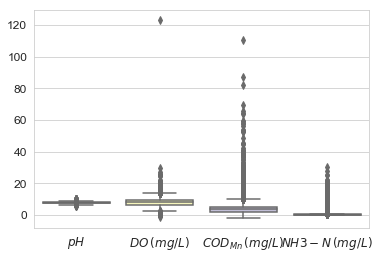

In [14]:
plt.figure()
sns.set_style("whitegrid")
sns.boxplot(data=df,palette="Set3")
plt.savefig('../img/before_z_score_box_plot.pdf')
plt.show()

In [15]:
matplotlib.rcParams['font.family']='Times New Roman'
# matplotlib.rcParams['font.family']='Arial'
matplotlib.rcParams.update({'font.size': 12})
# 12px = 9pt

In [16]:
# plt.figure()

# figArray = df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
# figArray[0].set_ylabel("")
# figArray[1].set_ylabel("")
# figArray[2].set_ylabel("")
# figArray[3].set_ylabel("")

# plt.savefig('../img/before_z_score_v1.pdf')
# plt.show()

In [17]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter 

# ymajorFormatter = FormatStrFormatter('%1.2f') #设置y轴标签文本的格式
ymajorFormatter = FormatStrFormatter('%d') #设置y轴标签文本的格式
# ymajorLocator   = MultipleLocator(0.5) #将y轴主刻度标签设置为0.5的倍数
# yminorLocator  = MultipleLocator(0.01) #将此y轴次刻度标签设置为0.1的倍数

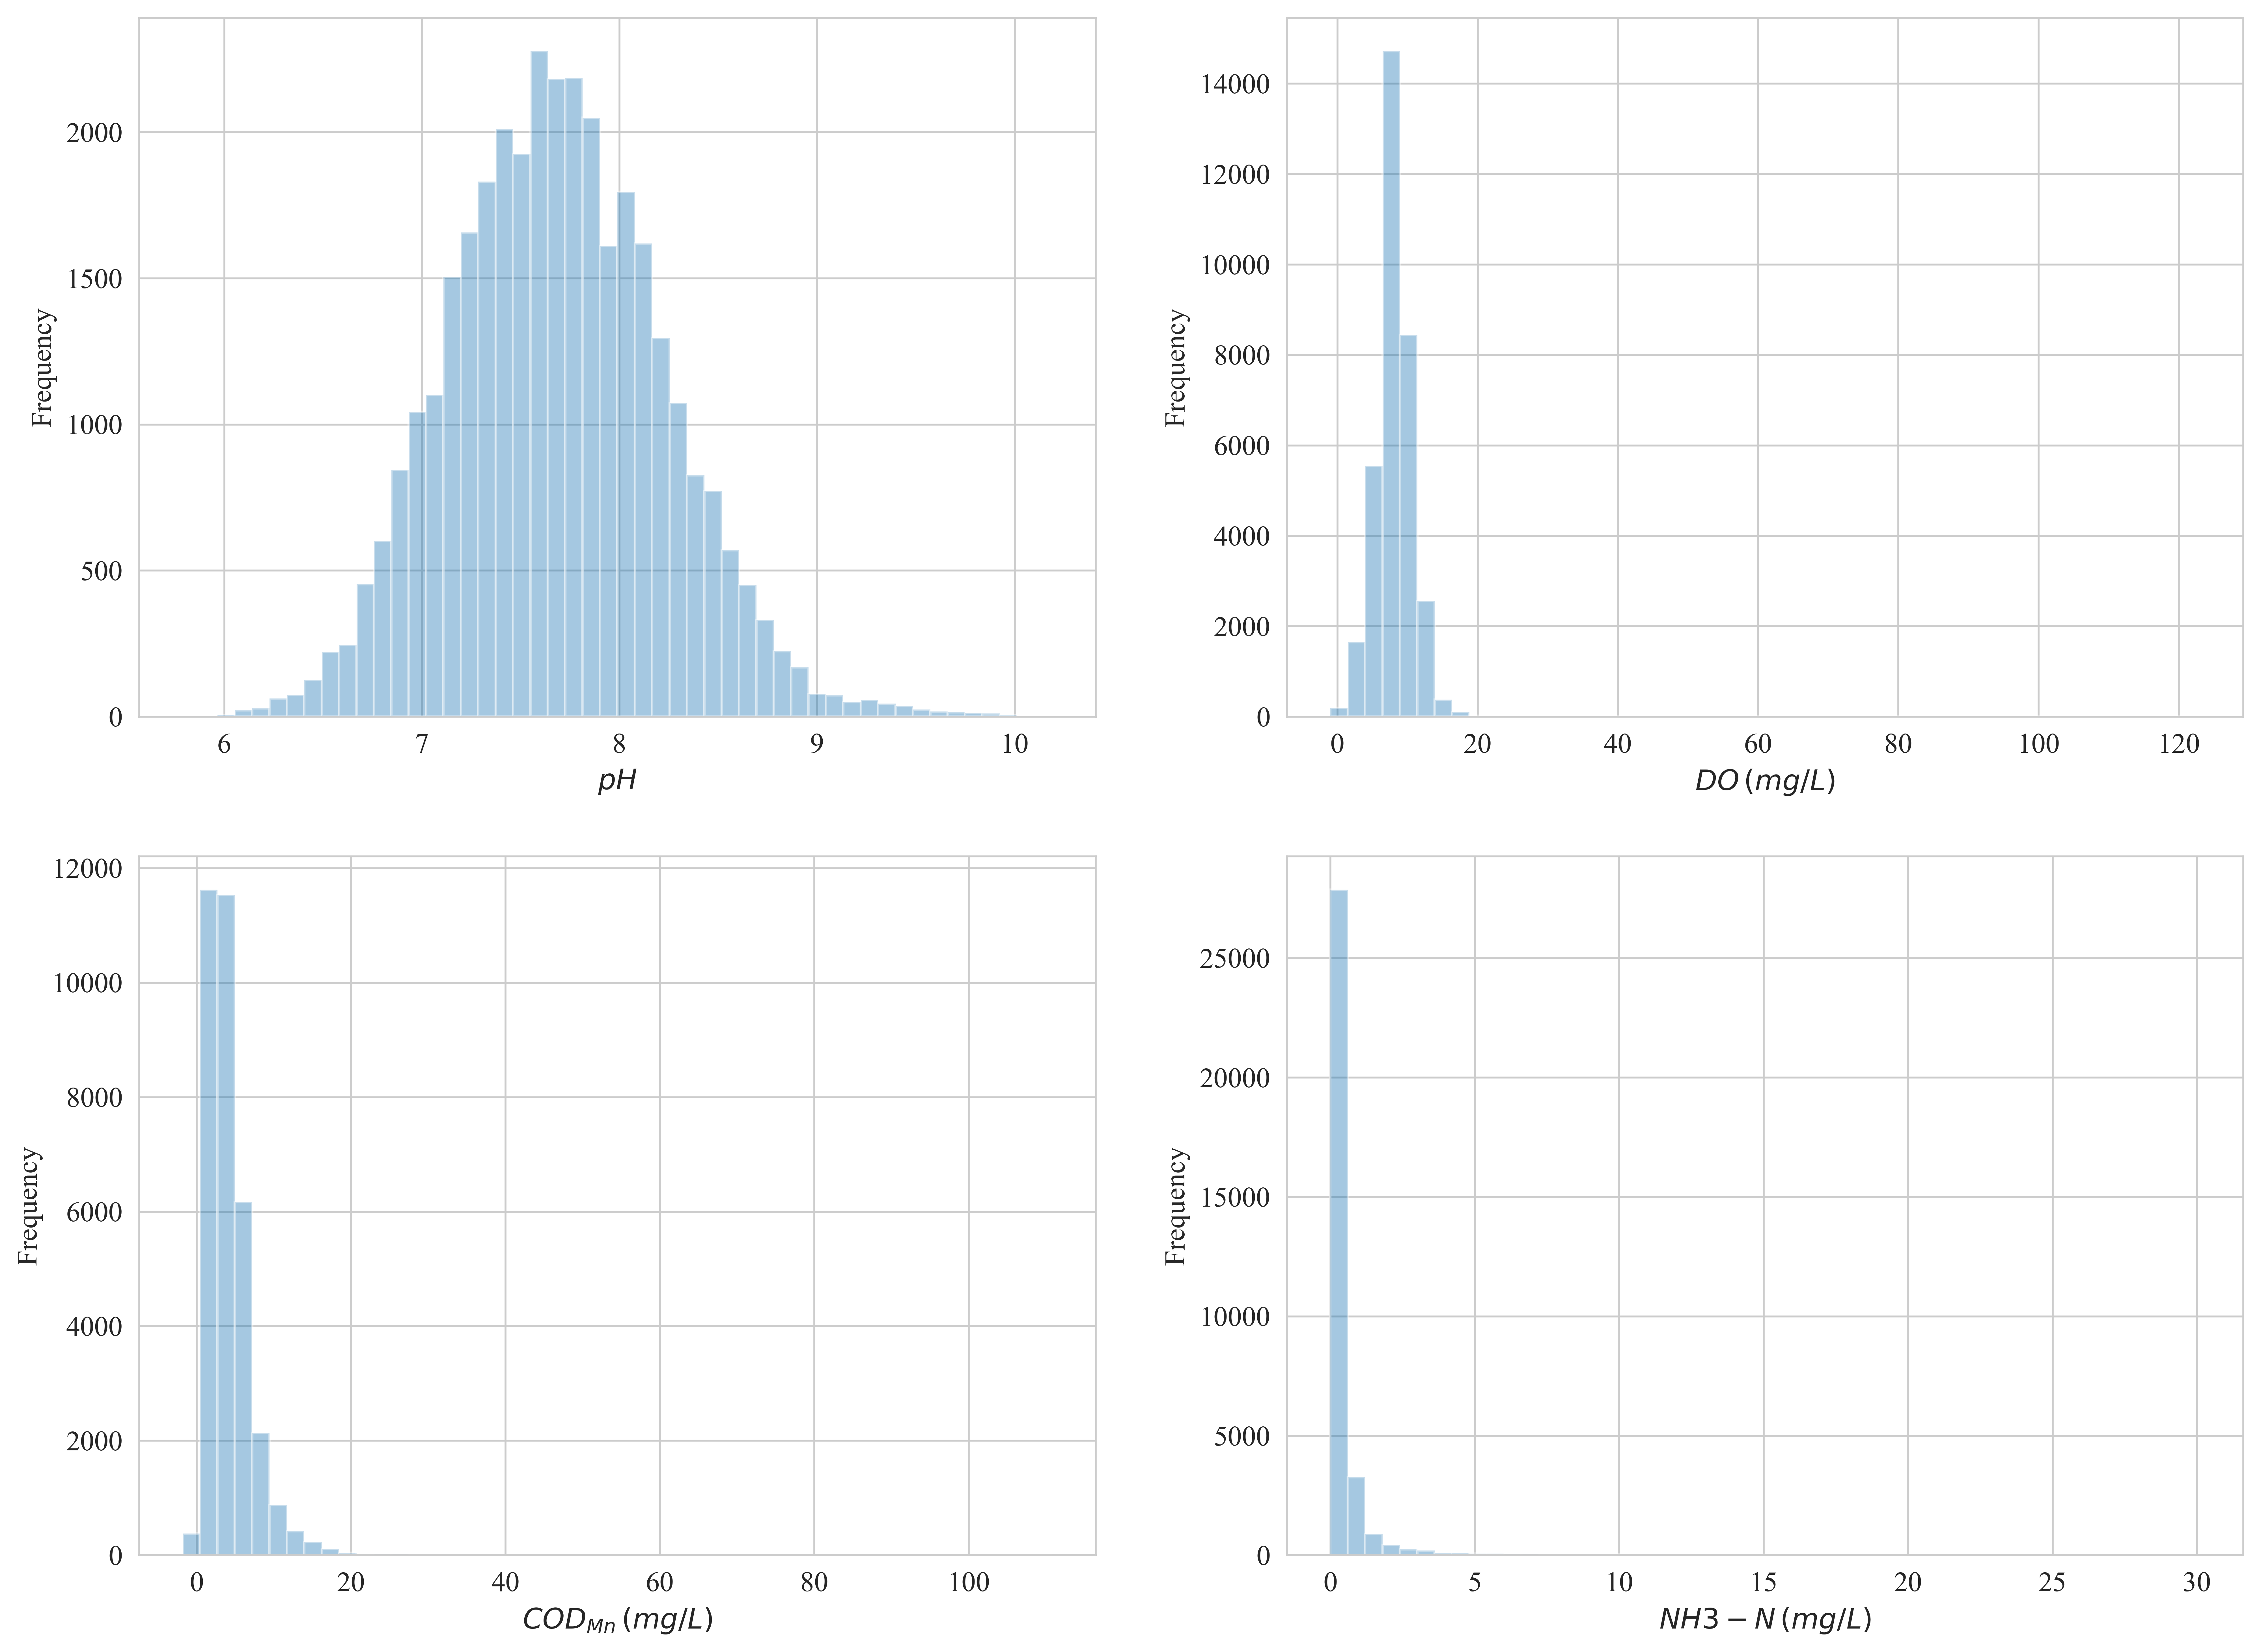

In [18]:
plt.figure(figsize=(16, 12), dpi=600)

ax1 = plt.subplot(221)
sns.distplot(pd.Series(df.dropna(axis=0)['$pH$']), kde=False, bins=50)
# plt.legend()
# ax.yaxis.set_major_locator(ymajorLocator)
ax1.yaxis.set_major_formatter(ymajorFormatter)
ax1.set_ylabel("Frequency")

ax2 = plt.subplot(222)
sns.distplot(pd.Series(df.dropna(axis=0)['$DO\,(mg/L)$']), kde=False, bins=50)
ax2.yaxis.set_major_formatter(ymajorFormatter)
ax2.set_ylabel("Frequency")


ax3 = plt.subplot(223)
sns.distplot(pd.Series(df.dropna(axis=0)['$COD_{Mn}\,(mg/L)$']), kde=False, bins=50)
ax3.yaxis.set_major_formatter(ymajorFormatter)
ax3.set_ylabel("Frequency")


ax4 = plt.subplot(224)
sns.distplot(pd.Series(df.dropna(axis=0)['$NH3-N\,(mg/L)$']), kde=False, bins=50)
ax4.yaxis.set_major_formatter(ymajorFormatter)
ax4.set_ylabel("Frequency")


plt.savefig('../img/before_z_score_distribution_v2.pdf')
plt.savefig('../img/before_z_score_distribution_v2.png')
plt.show()

In [19]:
# df[df["DO(mg/l)"] > 40]

In [20]:
# df[df["CODMn(mg/l)"] > 70]

In [21]:
# drop_columns = ['水系', '点位名称', '河流名称']

# df = df.dropna(axis=0)
# df.drop(drop_columns, 1, inplace=True)

In [22]:
# df[df.isnull().values==True]

In [23]:
df = (df-df.mean())/df.std(ddof=0)

In [24]:
# df["pH"] = (df["pH"] - df["pH"].mean())/df["pH"].std(ddof=0)
# df["DO(mg/l)"] = (df["DO(mg/l)"] - df["DO(mg/l)"].mean())/df["DO(mg/l)"].std(ddof=0)
# df["CODMn(mg/l)"] = (df["CODMn(mg/l)"] - df["CODMn(mg/l)"].mean())/df["CODMn(mg/l)"].std(ddof=0)
# df["NH3-N(mg/l)"] = (df["NH3-N(mg/l)"] - df["NH3-N(mg/l)"].mean())/df["NH3-N(mg/l)"].std(ddof=0)

In [25]:
# plt.figure()

# figArray = df.plot.hist(subplots=True, bins=100)  #将各列在一figure中分成子图，
# figArray[0].set_ylabel("")
# figArray[1].set_ylabel("")
# figArray[2].set_ylabel("")
# figArray[3].set_ylabel("")

# plt.savefig('../img/after_z_score_v1.pdf')
# plt.show()

In [26]:
# pd.Series(df['pH'],name='$pH$')
# pd.Series(df['DO(mg/l)'],name='$DO (mg/L)$')
# pd.Series(df['CODMn(mg/l)'],name='$COD_{Mn} (mg/L)$')
# pd.Series(df['NH3-N(mg/l)'],name='$NH3-N (mg/L)$')


In [27]:
# plt.figure(figsize=(16, 12), dpi=600)

# ax = plt.subplot(221)
# sns.distplot(df['$pH$'], kde=False, bins=50)
# # ax.yaxis.set_major_locator(ymajorLocator)
# ax.yaxis.set_major_formatter(ymajorFormatter)
# ax.set_ylabel("Frequency")

# ax = plt.subplot(222)
# sns.distplot(df['$DO\,(mg/L)$'], kde=False, bins=50)
# ax.yaxis.set_major_formatter(ymajorFormatter)
# ax.set_ylabel("Frequency")


# ax = plt.subplot(223)
# sns.distplot(df['$COD_{Mn}\,(mg/L)$'], kde=False, bins=50)
# ax.yaxis.set_major_formatter(ymajorFormatter)
# ax.set_ylabel("Frequency")


# ax = plt.subplot(224)
# sns.distplot(pd.Series(df['$NH3-N\,(mg/L)$']), kde=False, bins=50)
# ax.yaxis.set_major_formatter(ymajorFormatter)
# ax.set_ylabel("Frequency")


# plt.savefig('../img/after_z_score_distribution_v2.pdf')
# plt.savefig('../img/after_z_score_distribution_v2.png')
# plt.show()

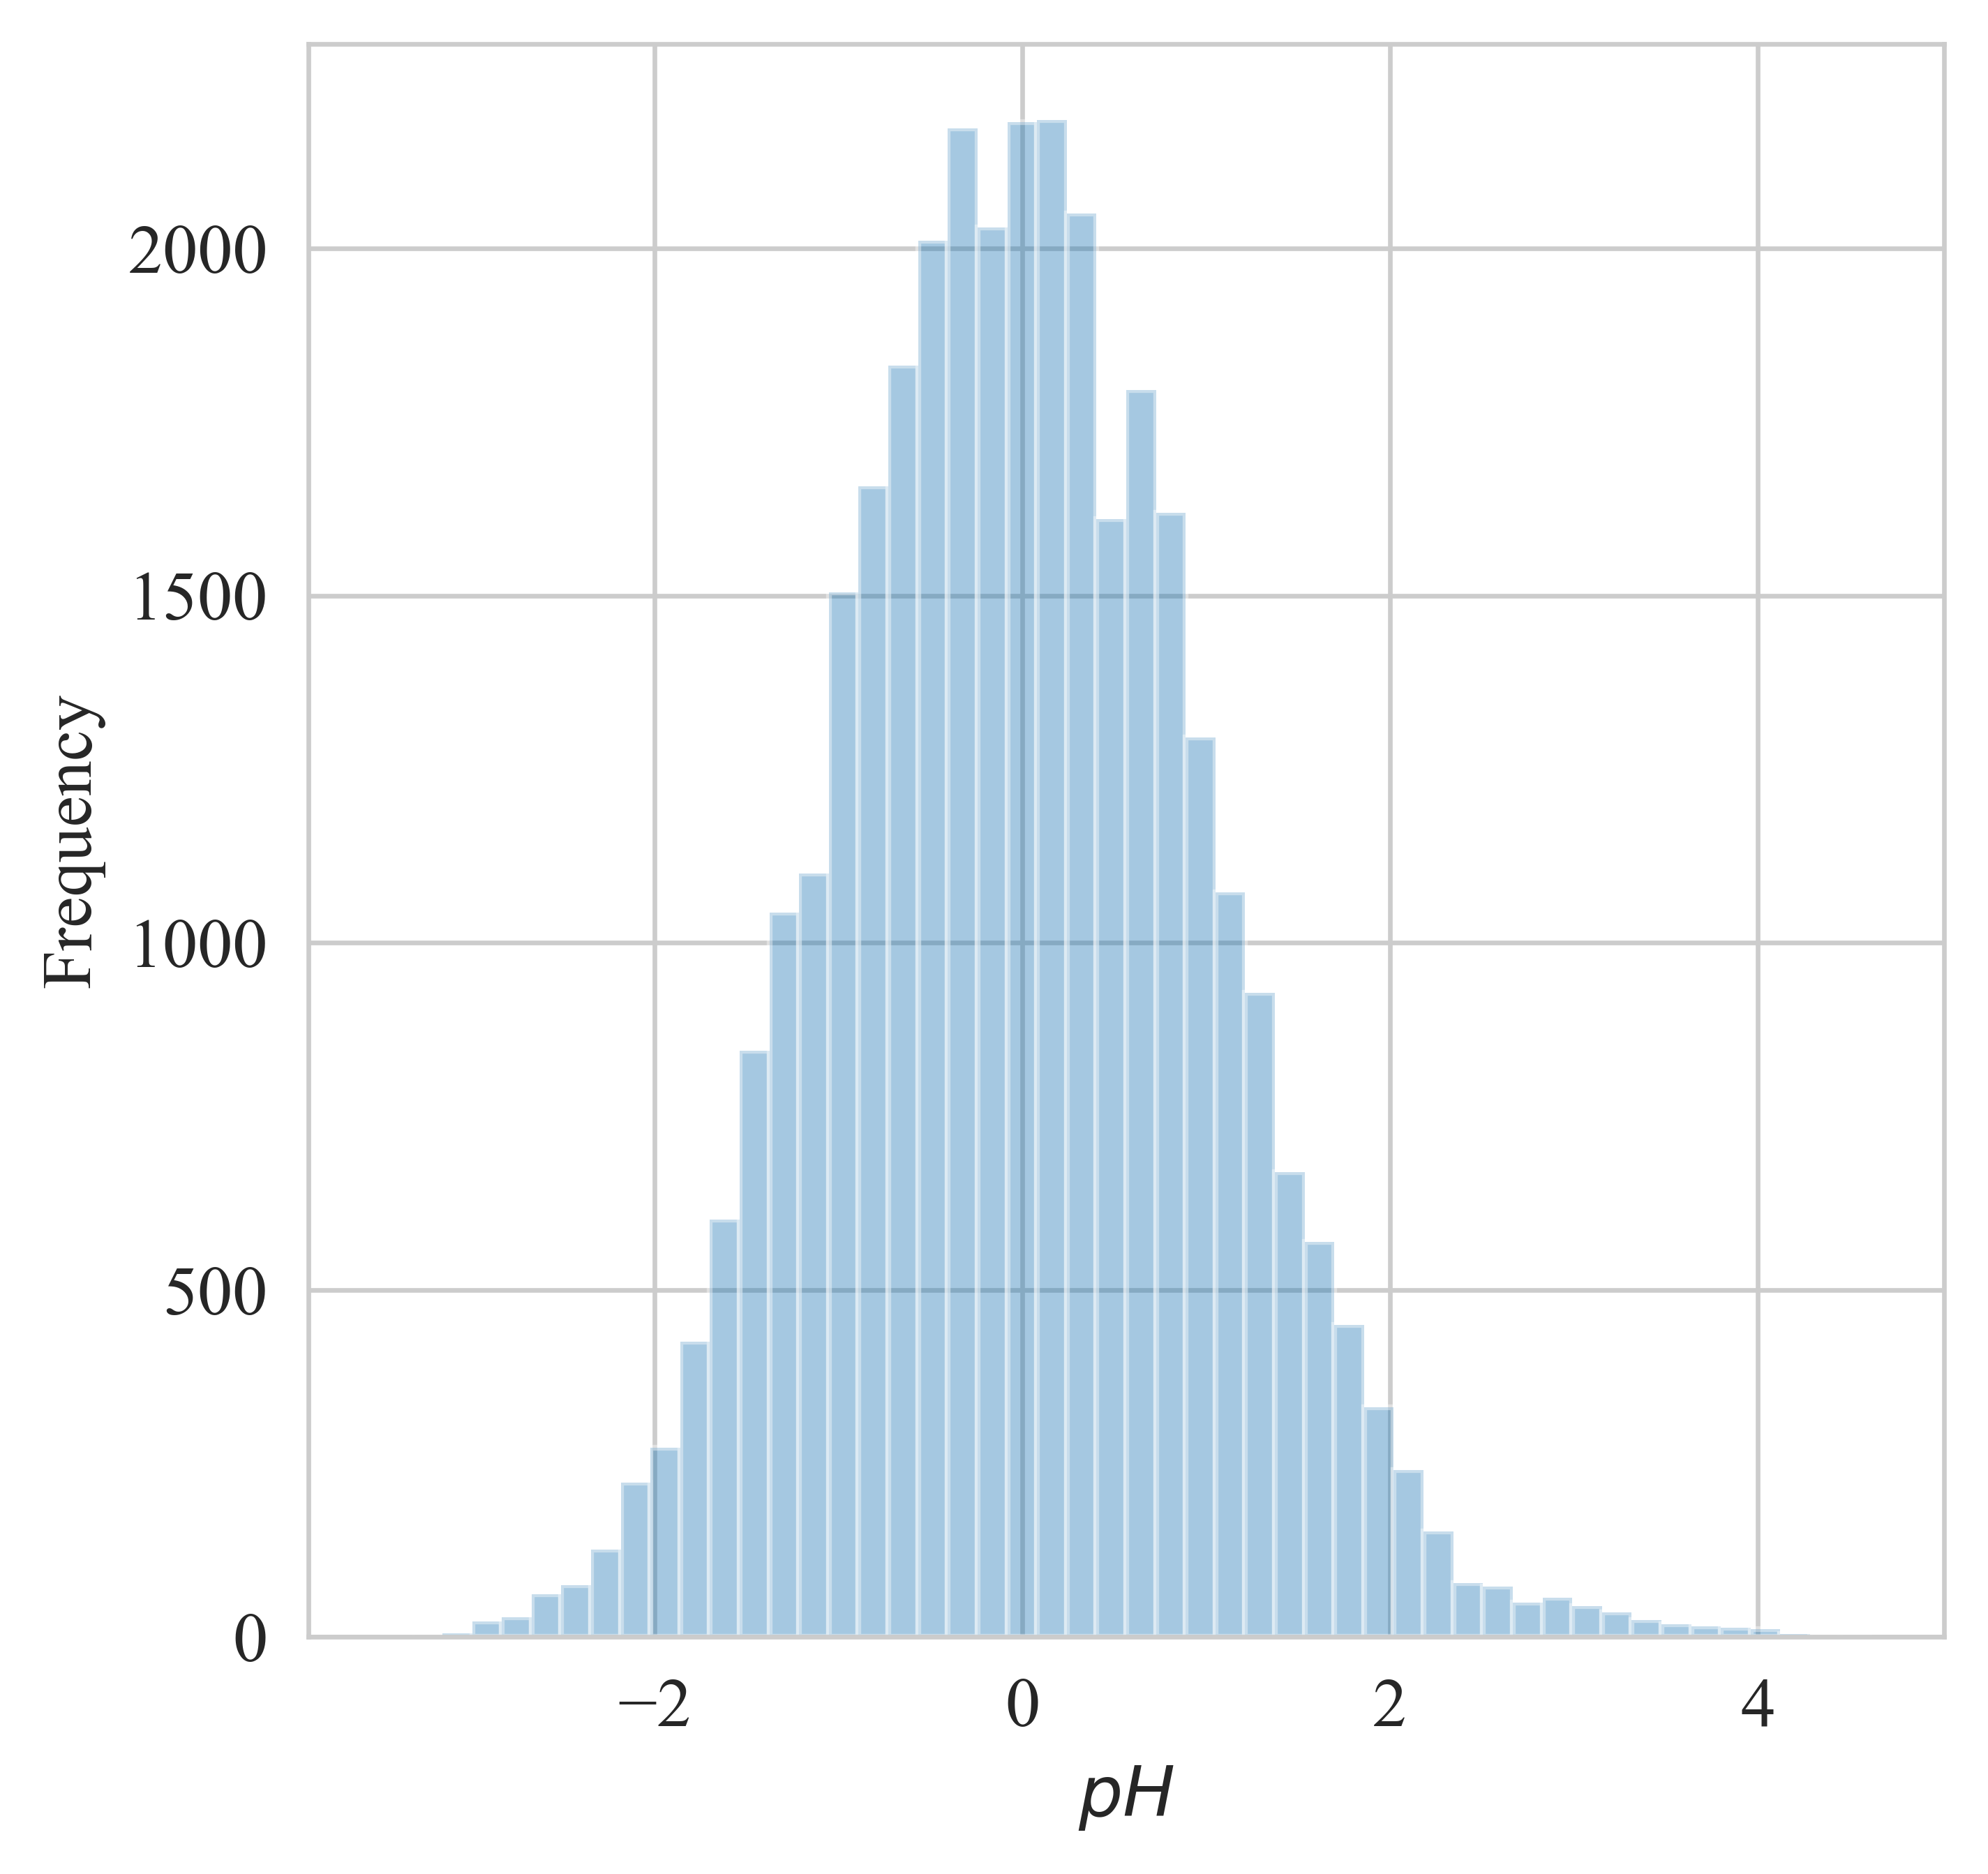

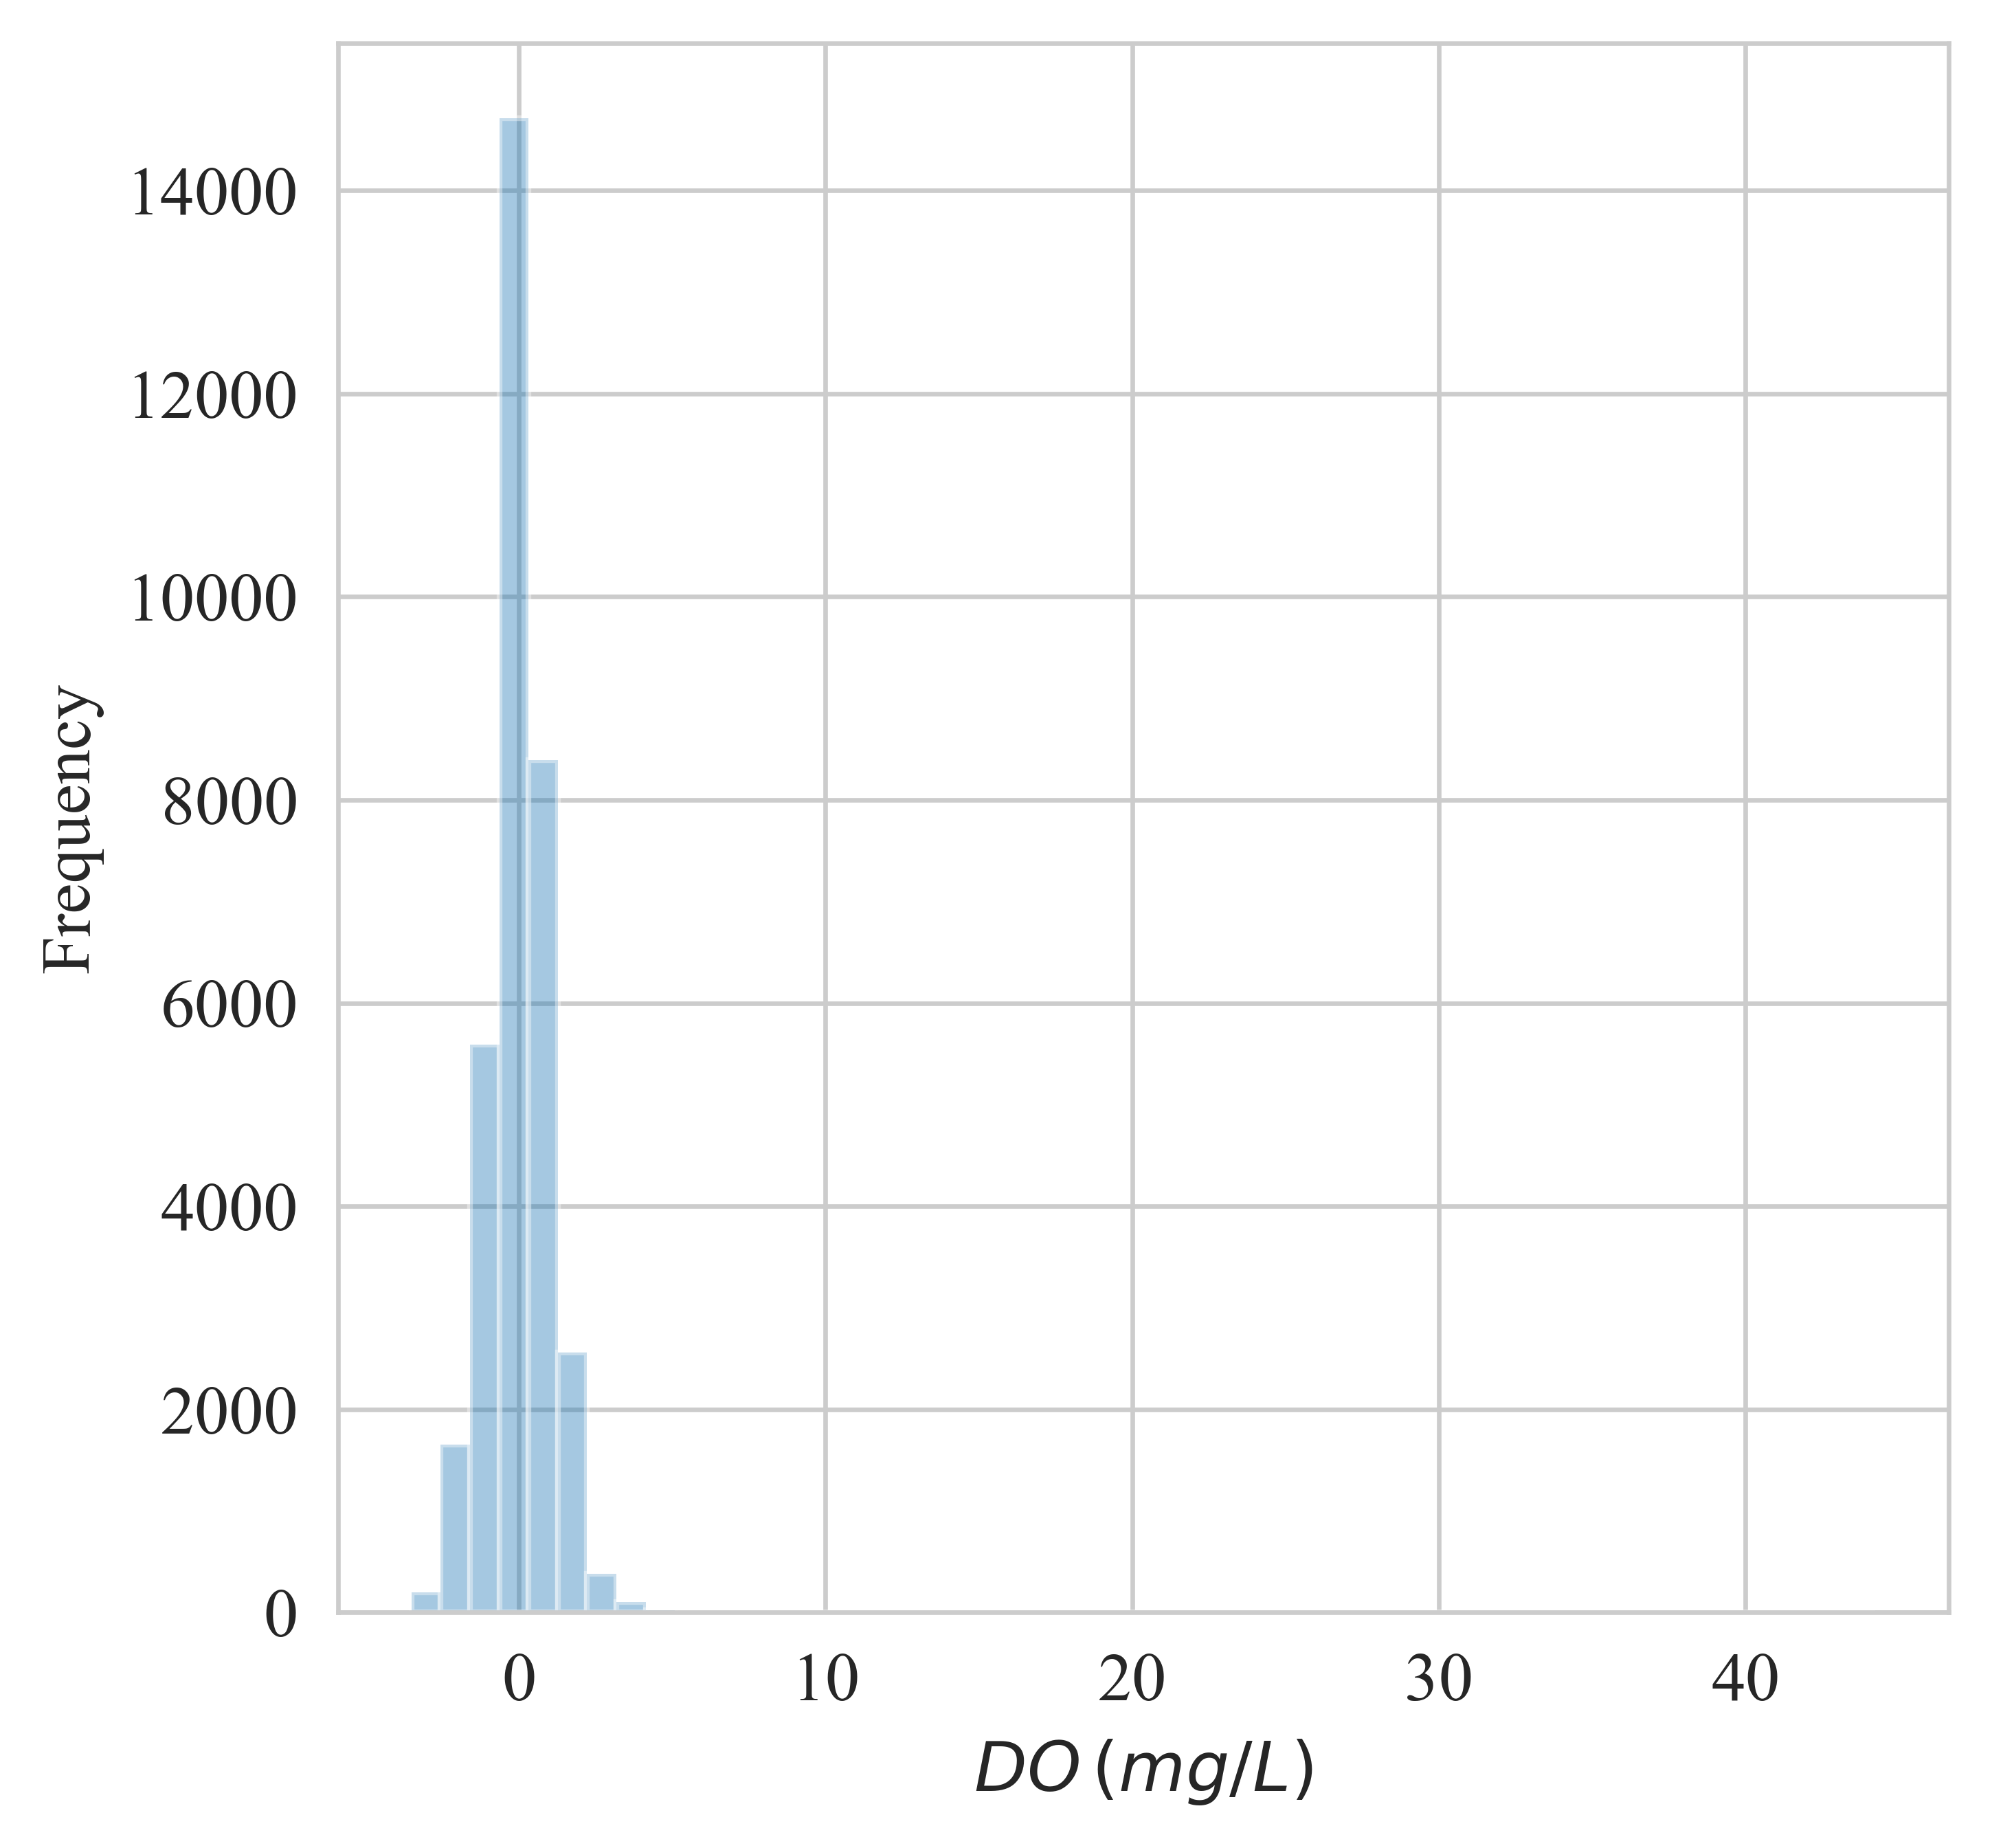

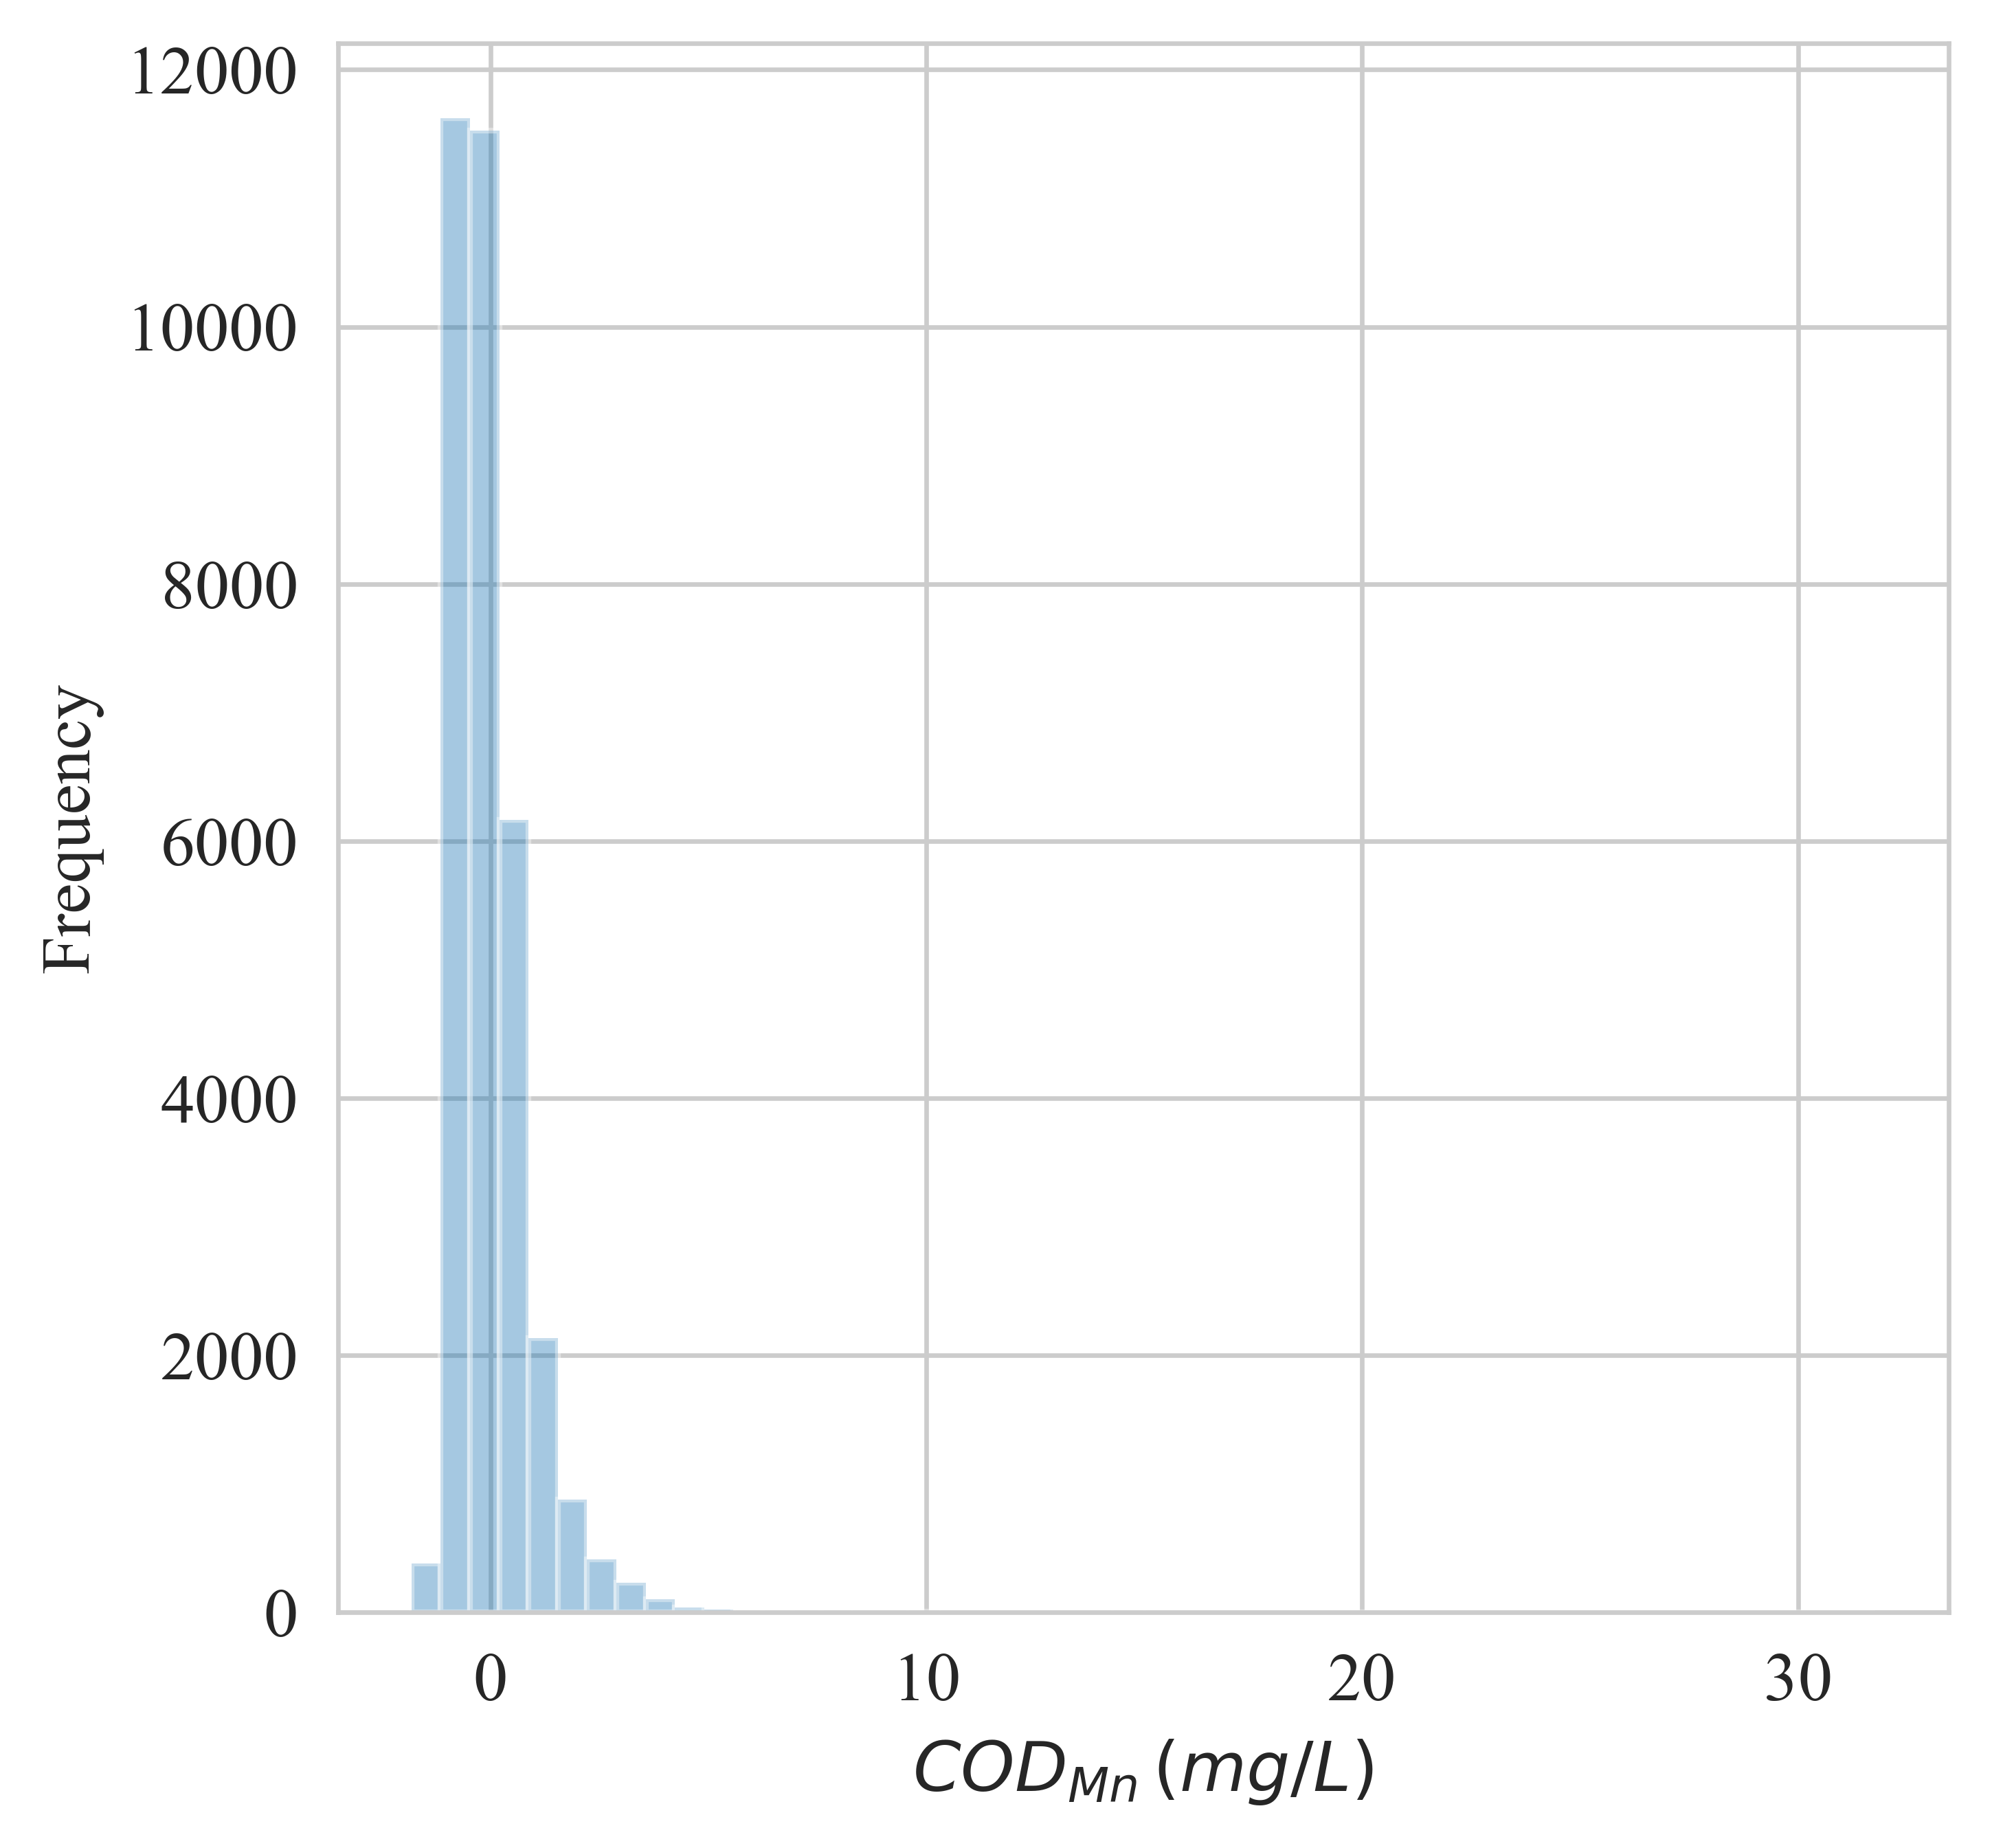

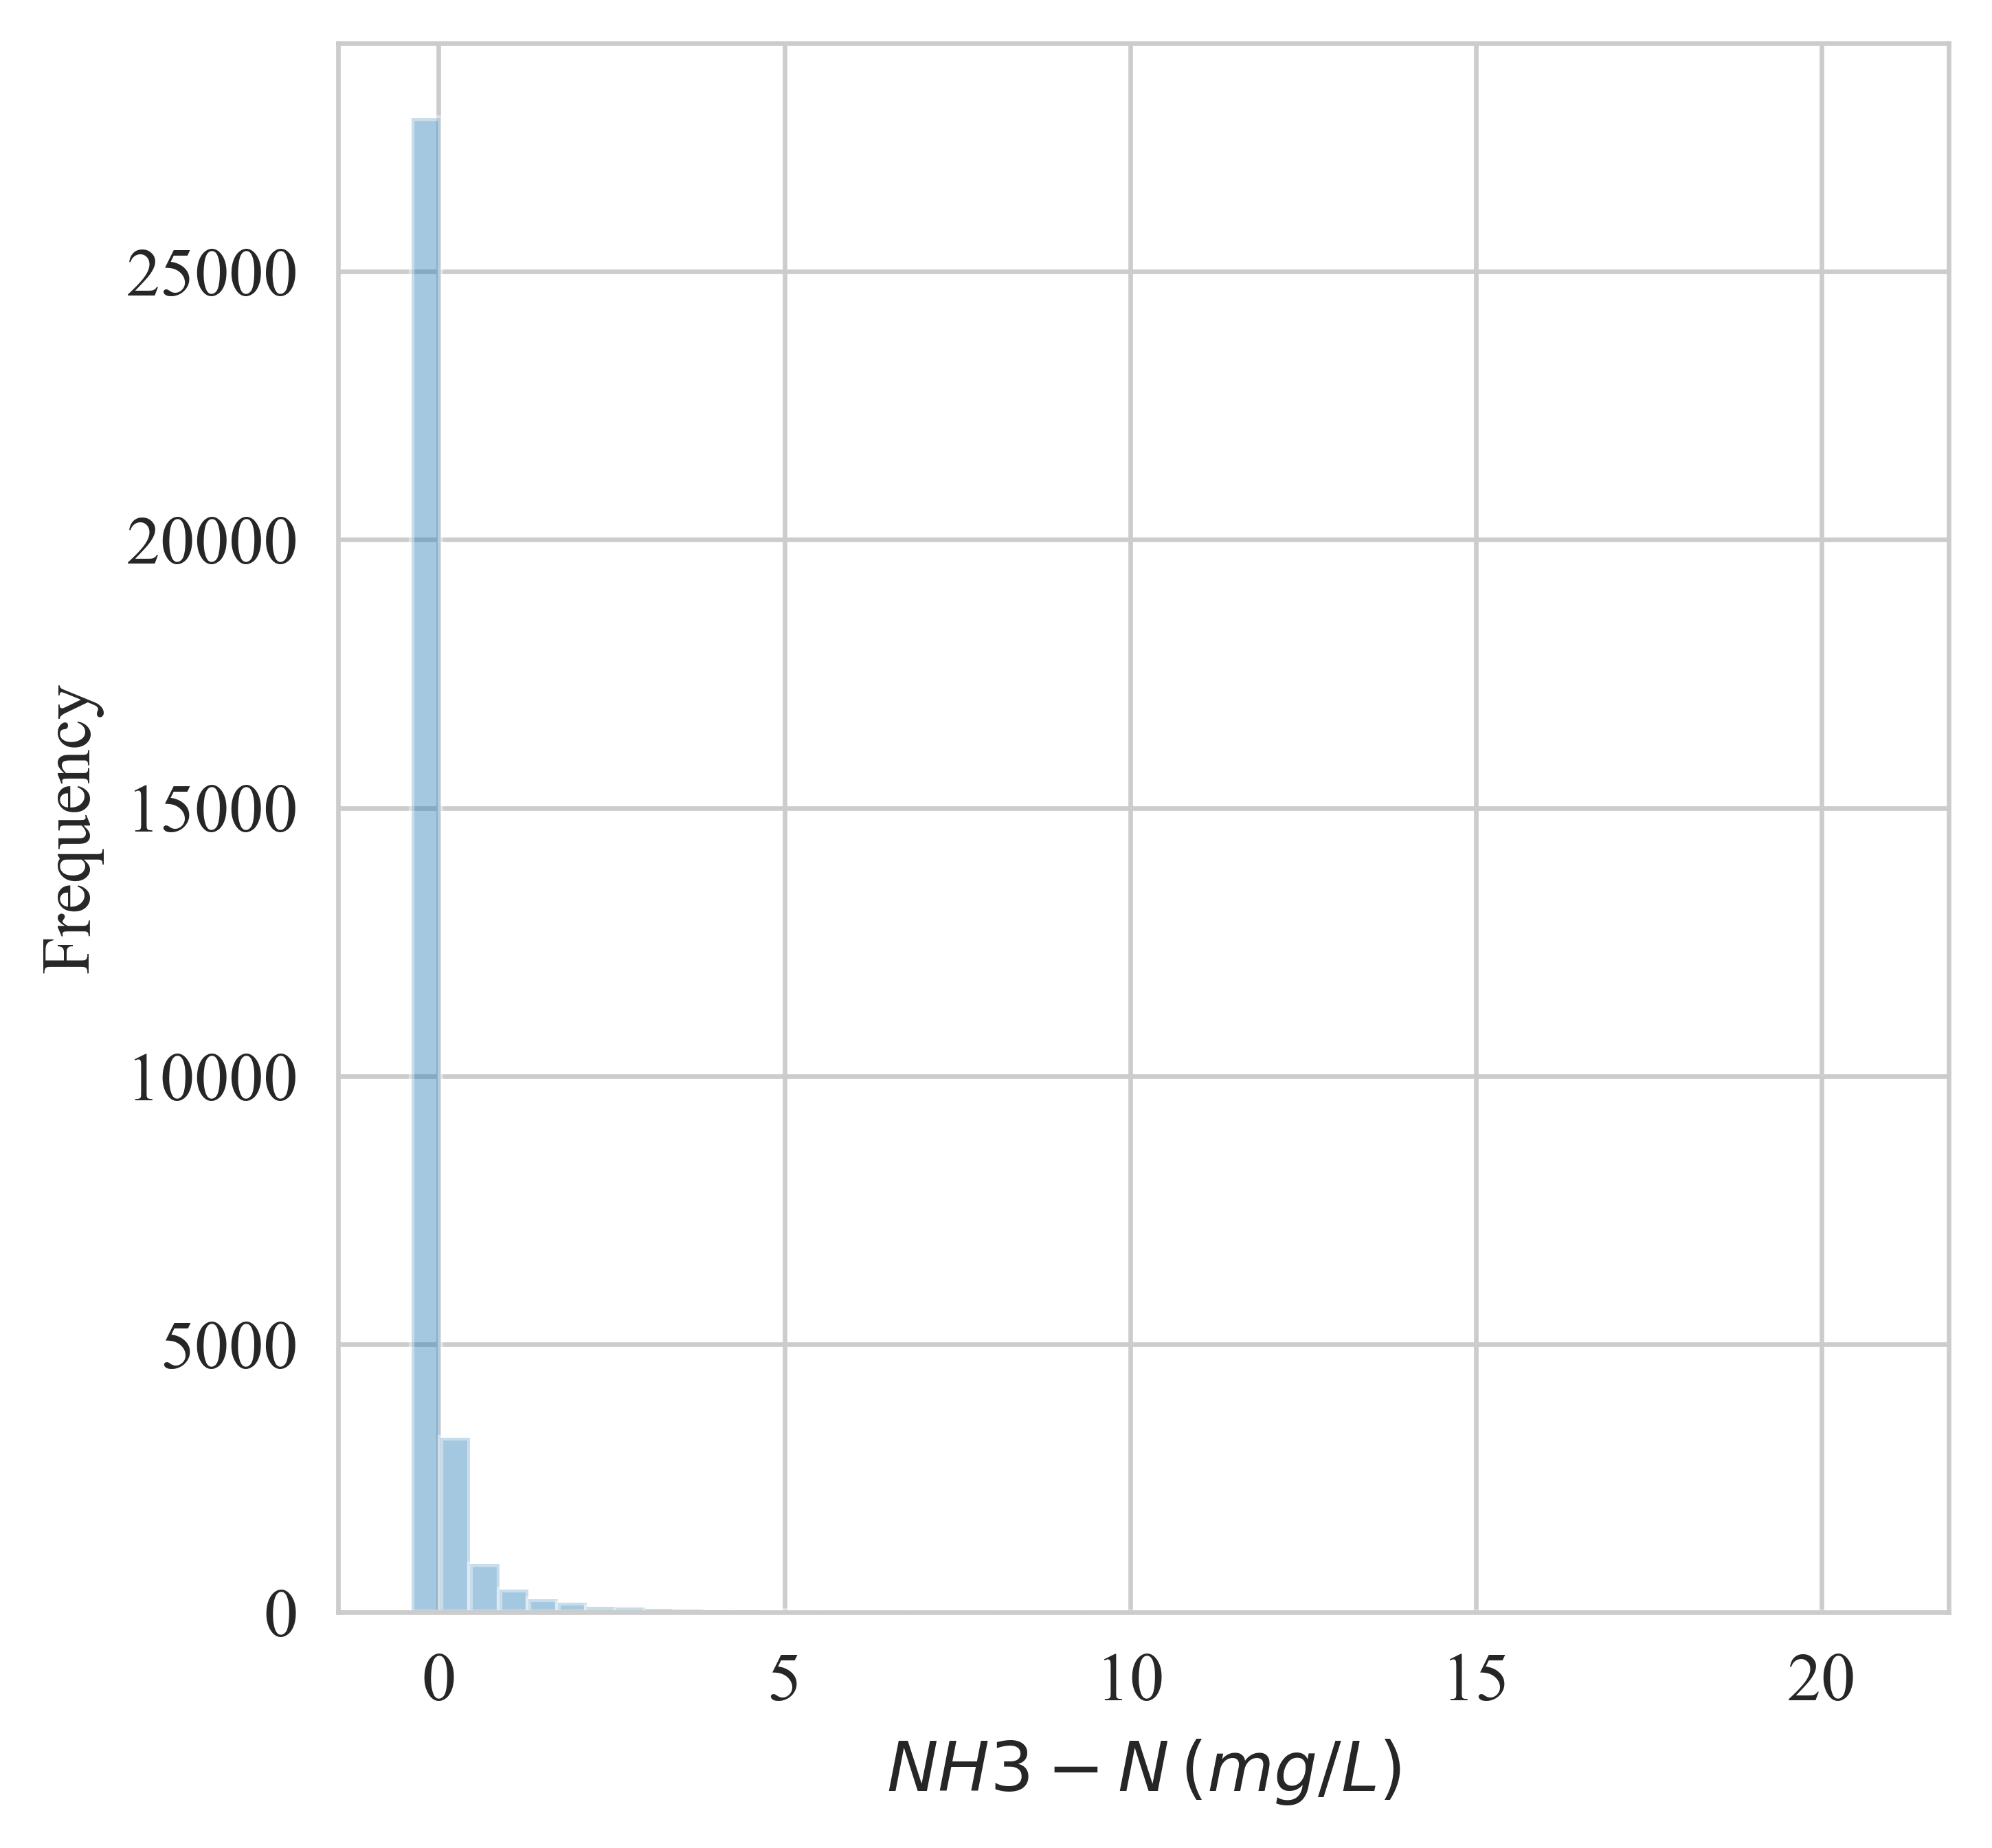

In [30]:
ax = plt.figure(figsize=(width_inch, width_inch), dpi=600)

sns.distplot(df['$pH$'], kde=False, bins=50)
# ax.yaxis.set_major_locator(ymajorLocator)
plt.ylabel("Frequency")
plt.savefig('../img/after_z_score_ph.png')
plt.show()

ax = plt.figure(figsize=(width_inch, width_inch), dpi=600)
sns.distplot(df['$DO\,(mg/L)$'], kde=False, bins=50)
plt.ylabel("Frequency")
plt.savefig('../img/after_z_score_do.png')
plt.show()

ax = plt.figure(figsize=(width_inch, width_inch), dpi=600)
sns.distplot(df['$COD_{Mn}\,(mg/L)$'], kde=False, bins=50)
plt.ylabel("Frequency")
plt.savefig('../img/after_z_score_cod.png')
plt.show()

ax = plt.figure(figsize=(width_inch, width_inch), dpi=600)
sns.distplot(pd.Series(df['$NH3-N\,(mg/L)$']), kde=False, bins=50)
plt.ylabel("Frequency")
plt.savefig('../img/after_z_score_nh3.png')
plt.show()

In [29]:
# plt.figure()
# sns.set_style("whitegrid")
# sns.boxplot(data=df[["pH","DO(mg/l)","CODMn(mg/l)","NH3-N(mg/l)"]],palette="Set3")
# plt.savefig('../img/after_z_score_box_plot.pdf')
# plt.show()

In [30]:
# output_path = os.getcwd()+'/../data/water/csv/20122018freshwater_four_feature.csv'
# data.to_csv(output_path, encoding='utf-8', index=False)